<h1><font color="blue">집합 연산과 최대값 찾기</font></h1>

<h2><font color="red">색인의 집합 연산</font></h2>

<h4><font color="green">가전 제품 데이터</font></h4>

<h6><font color="BlueViolet">1번 파일 살펴 보기</font></h6>

In [4]:
import pandas as pd
import numpy as np

In [5]:
sungjuk01 = pd.read_csv('./../data/sungjuk01.csv', encoding='cp949', \
                       index_col='이름')
sungjuk01

,국어
이름,
강유심,60
신서윤,75
최윤라,80
박윤정,75


In [6]:
sungjuk01idx = sungjuk01.index
sungjuk01idx

Index(['강유심', '신서윤', '최윤라', '박윤정'], dtype='object', name='이름')

In [7]:
print(sungjuk01idx.min())
print(sungjuk01idx.max())
print(sungjuk01idx.size)

강유심
최윤라
4


In [8]:
# sungjuk01idx[1] = '전기밥솥'

In [10]:
newindex = sungjuk01idx + ' 학생'
sungjuk01.index = newindex
sungjuk01

,국어
이름,
강유심 학생,60
신서윤 학생,75
최윤라 학생,80
박윤정 학생,75


In [12]:
result = sungjuk01idx > '자'
result

array([False, False,  True, False])

In [13]:
sungjuk01[result]

,국어
이름,
최윤라 학생,80


<h6><font color="BlueViolet">2번 파일 살펴 보기</font></h6>

In [17]:
sungjuk02 = pd.read_csv('./../data/sungjuk02.csv', encoding='cp949', \
                       index_col='이름')
sungjuk02

,영어
이름,
강유심,50
신서윤,80
김만철,90
윤선희,70


In [18]:
sungjuk02idx = sungjuk02.index
sungjuk02idx

Index(['강유심', '신서윤', '김만철', '윤선희'], dtype='object', name='이름')

In [19]:
print(sungjuk01idx)

Index(['강유심', '신서윤', '최윤라', '박윤정'], dtype='object', name='이름')


<h4><font color="green">색인의 집합 연산</font></h4>

In [20]:
sungjuk01idx.union(sungjuk02idx)

Index(['강유심', '김만철', '박윤정', '신서윤', '윤선희', '최윤라'], dtype='object', name='이름')

In [21]:
sungjuk01idx.intersection(sungjuk02idx)

Index(['강유심', '신서윤'], dtype='object', name='이름')

In [22]:
diff01 = sungjuk01idx.difference(sungjuk02idx)
diff01

Index(['박윤정', '최윤라'], dtype='object', name='이름')

In [23]:
diff02 = sungjuk02idx.difference(sungjuk01idx)
diff02

Index(['김만철', '윤선희'], dtype='object', name='이름')

In [24]:
diff01 == diff02

array([False, False])

<h2><font color="red">색인의 참조 복사와 값 복사</font></h2>

<h4><font color="green">출장 내역 데이터</font></h4>

<h6><font color="BlueViolet">참조 복사와 값 복사</font></h6>

In [58]:
homeware = pd.read_csv('./../data/가전제품02.csv', encoding='cp949', \
                       index_col='제품명')
homeware

,분기,일생산량,불량품
제품명,,,
미니오븐,2,85,26
전기밥솥,2,70,39
믹서기,2,85,39
전자레인지,2,90,22
미니냉장고,2,90,22
선풍기,2,65,33


In [59]:
homeware01 = homeware['일생산량']
homeware01.to_frame()

,일생산량
제품명,
미니오븐,85
전기밥솥,70
믹서기,85
전자레인지,90
미니냉장고,90
선풍기,65


In [60]:
homeware02 = homeware['일생산량']
homeware02.to_frame()

,일생산량
제품명,
미니오븐,85
전기밥솥,70
믹서기,85
전자레인지,90
미니냉장고,90
선풍기,65


In [61]:
print(homeware01 is homeware02)

True


In [63]:
homeware01 = homeware['일생산량'].copy()
homeware01.to_frame()

,일생산량
제품명,
미니오븐,85
전기밥솥,70
믹서기,85
전자레인지,90
미니냉장고,90
선풍기,65


In [64]:
homeware02 = homeware['일생산량'].copy()
homeware02.to_frame()

,일생산량
제품명,
미니오븐,85
전기밥솥,70
믹서기,85
전자레인지,90
미니냉장고,90
선풍기,65


In [65]:
print(homeware01 is homeware02)

False


In [69]:
homeware01 = homeware01.sort_index()
homeware01.to_frame()

,일생산량
제품명,
미니냉장고,90
미니오븐,85
믹서기,85
선풍기,65
전기밥솥,70
전자레인지,90


In [68]:
homeware02.to_frame()

,일생산량
제품명,
미니오븐,85
전기밥솥,70
믹서기,85
전자레인지,90
미니냉장고,90
선풍기,65


<h2><font color="red">특정 그룹별 최대 값 찾기</font></h2>

<h4><font color="green">가전 제품 데이터</font></h4>

In [184]:
import pandas as pd

In [185]:
students = pd.read_csv('./../data/students.csv' ,encoding='cp949')
students.head()

,이름,학기,국어,영어,수학
0,김훈희,1,65,80,70
1,윤지영,1,75,90,60
2,박기현,1,50,75,95
3,허혜숙,1,90,85,75
4,권도기,1,55,70,95


In [186]:
korean = students[['이름', '국어']]
korean.head()

,이름,국어
0,김훈희,65
1,윤지영,75
2,박기현,50
3,허혜숙,90
4,권도기,55


In [187]:
korean = korean.sort_values(['이름', '국어'], ascending=[True, False])
korean.head(8)

,이름,국어
16,권도기,95
10,권도기,90
4,권도기,55
22,권도기,55
6,김훈희,85
0,김훈희,65
12,김훈희,60
18,김훈희,55


In [188]:
max_korean = korean.drop_duplicates(subset='이름')
max_korean = max_korean.set_index('이름')
max_korean

,국어
이름,
권도기,95
김훈희,85
박기현,85
송정옥,95
윤지영,75
허혜숙,90


In [189]:
chartdata01 = max_korean.copy().sort_values(by='국어', ascending=False)
chartdata01

,국어
이름,
권도기,95
송정옥,95
허혜숙,90
김훈희,85
박기현,85
윤지영,75


In [190]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

Text(0.5, 1.0, '학생별 국어 최대 점수')

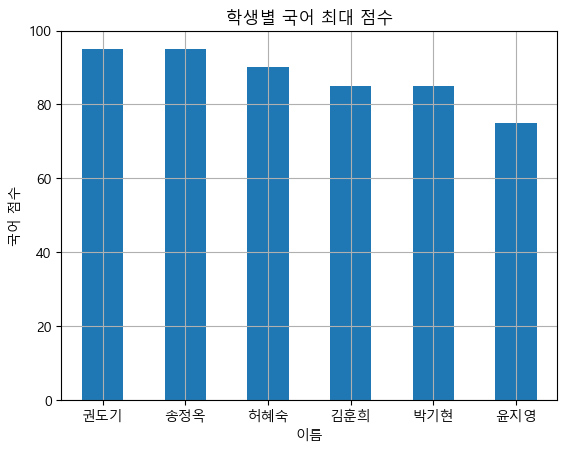

In [191]:
chartdata01.plot(kind='bar', rot=0, use_index=True, grid=True, legend=False, \
                ylim=[0, 100])
plt.xlabel('이름')
plt.ylabel('국어 점수')
plt.title('학생별 국어 최대 점수')

In [192]:
students = students.set_index('이름') 
students.head()

,학기,국어,영어,수학
이름,,,,
김훈희,1,65,80,70
윤지영,1,75,90,60
박기현,1,50,75,95
허혜숙,1,90,85,75
권도기,1,55,70,95


In [193]:
students['국어_최대값'] = max_korean['국어'] 

In [194]:
students['rate'] = 100 * students['국어']/students['국어_최대값'] 

In [195]:
students.sort_index().head()

,학기,국어,영어,수학,국어_최대값,rate
이름,,,,,,
권도기,1,55,70,95,95,57.894737
권도기,3,95,70,90,95,100.000000
권도기,2,90,65,65,95,94.736842
권도기,4,55,95,70,95,57.894737
김훈희,1,65,80,70,85,76.470588


In [196]:
students.query('국어 > 국어_최대값')

,학기,국어,영어,수학,국어_최대값,rate
이름,,,,,,


<h2><font color="red">열마다 최대 값을 가지는 행 정보 찾기</font></h2>

<h4><font color="green">개인 신상 데이터</font></h4>

In [197]:
exercise = pd.read_csv('./../data/exercise.csv', encoding='CP949', \
                        index_col='name')
exercise

,kor,eng,math,sci
name,,,,
이효신,70,50,90,40
김윤정,80,70,30,70
신숙희,미응시,90,60,60
유지현,50,미응시,50,95


In [198]:
exercise.dtypes

kor     object
eng     object
math     int64
sci      int64
dtype: object

In [199]:
exercise.kor.value_counts()

70     1
80     1
미응시    1
50     1
Name: kor, dtype: int64

In [201]:
exercise['kor'] = pd.to_numeric(exercise.kor, errors='coerce')
exercise['eng'] = pd.to_numeric(exercise.eng, errors='coerce')

In [202]:
exercise.dtypes

kor     float64
eng     float64
math      int64
sci       int64
dtype: object

In [203]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 이효신 to 유지현
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      float64
 1   eng     3 non-null      float64
 2   math    4 non-null      int64  
 3   sci     4 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 160.0+ bytes


In [204]:
import numpy as np

In [205]:
exercise_numeric = exercise.select_dtypes(include=[np.number])
exercise_numeric

,kor,eng,math,sci
name,,,,
이효신,70.0,50.0,90,40
김윤정,80.0,70.0,30,70
신숙희,NaN,90.0,60,60
유지현,50.0,NaN,50,95


In [206]:
criteria = exercise_numeric.nunique() == 2 
criteria

kor     False
eng     False
math    False
sci     False
dtype: bool

In [207]:
dropped_columns = exercise_numeric.columns[criteria].tolist()
dropped_columns # 제거된 열 리스트

[]

In [208]:
numeric_cols = exercise_numeric.drop(labels=dropped_columns, axis='columns')
numeric_cols

,kor,eng,math,sci
name,,,,
이효신,70.0,50.0,90,40
김윤정,80.0,70.0,30,70
신숙희,NaN,90.0,60,60
유지현,50.0,NaN,50,95


In [210]:
max_columns = numeric_cols.idxmax()
max_columns.to_frame()

,0
kor,김윤정
eng,신숙희
math,이효신
sci,유지현


In [211]:
min_columns = numeric_cols.idxmin()
min_columns.to_frame()

,0
kor,유지현
eng,이효신
math,김윤정
sci,이효신


In [212]:
df = pd.concat([max_columns, min_columns], axis=1)
df.columns = ['최고득점자', '최저득점자']
df

,최고득점자,최저득점자
kor,김윤정,유지현
eng,신숙희,이효신
math,이효신,김윤정
sci,유지현,이효신


In [214]:
print('과목/최고 득점자/점수')
for idx in max_columns.index:
    print(idx + '/' + max_columns[idx]  + '/' + str(numeric_cols.loc[max_columns[idx], idx]))

과목/최고 득점자/점수
kor/김윤정/80.0
eng/신숙희/90.0
math/이효신/90
sci/유지현/95


In [215]:
unique_max = max_columns.unique()
unique_max

array(['김윤정', '신숙희', '이효신', '유지현'], dtype=object)

In [216]:
numeric_cols.loc[unique_max]

,kor,eng,math,sci
name,,,,
김윤정,80.0,70.0,30,70
신숙희,NaN,90.0,60,60
이효신,70.0,50.0,90,40
유지현,50.0,NaN,50,95
